#### 부산 5대 범죄 데이터분석 및 시각화

##### 참고 사이트
- [공공데이터 포털](https://www.data.go.kr/data/15036510/fileData.do#/layer_data_infomation) , 
[깃허브](https://github.com/dkngkg/artData)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [41]:
# 부산시 연도 및 관서별 5대 범죄 발생 현황
bs_crime_18 = pd.read_csv('./data/18_BusanCrime.csv', encoding='utf-8')
bs_crime_18.rename(columns={' 성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)
bs_crime_18['연도'] = 2018
bs_crime_19 = pd.read_csv('./data/19_BusanCrime.csv', encoding='utf-8')
bs_crime_19.rename(columns={' 성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)
bs_crime_19['연도'] = 2019
bs_crime_20 = pd.read_csv('./data/20_BusanCrime.csv', encoding='utf-8')
bs_crime_20.rename(columns={' 성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)
bs_crime_20['연도'] = 2020
bs_crime_21 = pd.read_csv('./data/21_BusanCrime.csv', encoding='utf-8')
bs_crime_21.rename(columns={' 성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)
bs_crime_21['연도'] = 2021
## 자료 합치기  
df_4y = pd.concat([bs_crime_18, bs_crime_19, bs_crime_20, bs_crime_21], axis=0, ignore_index=True)
df_4y.groupby(['연도', '관서명']).sum()
df_4y = df_4y.drop(columns=['구분', '연번'])

In [42]:
df_4y.tail()

,관서명,살인,강도,성범죄,절도,폭력,연도
55,사하,4,2,80,907,1249,2021
56,연제,5,3,106,886,1382,2021
57,강서,0,3,40,356,537,2021
58,북부,5,7,79,926,1056,2021
59,기장,1,0,51,564,688,2021


In [40]:
# 연도 및 관할서별 5대 범죄 횟수 그룹화
pd.pivot_table(df_4y, index=['연도', '관서명'], aggfunc='sum')

강도  살인  성범죄    절도    폭력
연도   관서명                         
2018 강서    1   2   46   501   499
     금정    7   4   87   595   936
     기장    2   3   38   415   772
     남부   10   8  185  1458  2091
     동래    6   3   89  1078  1375
     동부    5   0   63   576   823
     부산진  17   1  321  2376  3253
     북부    3   7   72   805  1441
     사상    9   5  116  1018  1312
     사하    8   4  119  1062  1705
     서부    8   3   32   730   282
     연제    8   5   90   988  1578
     영도    2   4   43   329   666
     중부    2   1   47   954   784
     해운대   3   3  185  1376  1986
2019 강서    0   1   35   474   526
     금정   11  10   83  1036  1188
     기장    1   0   40   497   656
     남부    5   8  148  1541  2238
     동래    6   4   91   938  1468
     동부   10   0   52   696   934
     부산진  16   7  306  2424  3304
     북부    3   1   86   807  1614
     사상    3   8   91  1024  1446
     사하    4  10  103  1025  1535
     서부    4   1   43   606   596
     연제    5   3  124  1068  1646
     영도    5   4   32   350   662
     중부    4   3   64   700   822
     해운대   5   3  172  1305  2014
2020 강서    3   3   35   443   516
     금정    2   2   81   943   979
     기장    1   1   49   517   810
     남부    4   7  152  1345  1952
     동래    2   5  101  1018  1325
     동부    0   2   43   571   809
     부산진   9   3  295  2317  3166
     북부    4   5   80  1030  1435
     사상    6   7  109   969  1420
     사하    0   6   98  1034  1447
     서부    1   1   22   458   581
     연제    7   5  110  1136  1635
     영도    0   0   25   366   615
     중부    0   1   42   686   644
     해운대   0   3  174  1336  1722
2021 강서    3   0   40   356   537
     금정    2   5   69   778   793
     기장    0   1   51   564   688
     남부    6   4  161  1194  1638
     동래    1   2   99   922  1124
     동부    0   2   36   478   656
     부산진   5   2  256  2177  2614
     북부    7   5   79   926  1056
     사상    7   4   88   948  1070
     사하    2   4   80   907  1249
     서부    2   1   30   414   625
     연제    3   5  106   886  1382
     영도    1   4   51   299   512
     중부    2   3   30   583   565
     해운대  10   4  162  1238  1585

In [17]:
# 5대 범죄의 4개년 총 건수
by_year = pd.pivot_table(df_4y, index=['연도'], aggfunc='sum', margins=True).reset_index()
by_year

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13252\3488309859.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  by_year = pd.pivot_table(df_4y, index=['연도'], aggfunc='sum', margins=True).reset_index()


,연도,강도,관서명,구분,살인,성범죄,연번,절도,폭력
0,2018,91,중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장,경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서,53,1533,120,14261,19503
1,2019,82,중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장,경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서,63,1470,120,14491,20649
2,2020,39,중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장,경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서,51,1416,120,14169,19056
3,2021,51,중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장,경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서,46,1338,120,12670,16094
4,All,263,중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남...,경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경찰서경...,213,5757,480,55591,75302


In [18]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

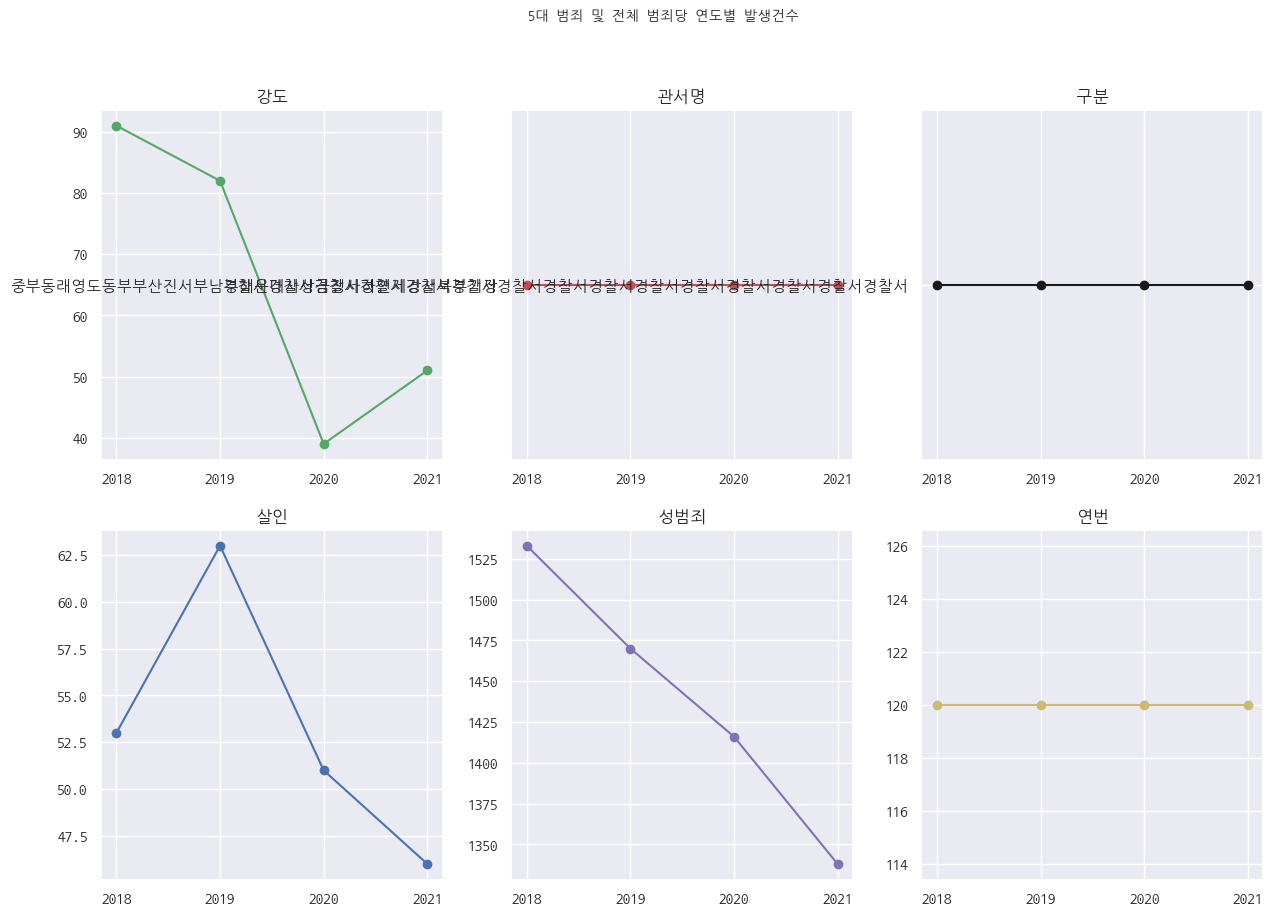

In [23]:
# 연도별 5대 범죄 시각화
x = ['2018', '2019', '2020', '2021']
color_list = ['go-', 'ro-', 'ko-', 'bo-', 'mo-', 'yo-']
col = by_year.columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.flatten()

for i in range(6):
    ax[i].plot(x, by_year[col[i+1]].iloc[:4], color_list[i])
    ax[i].set_title(col[i+1])
fig.suptitle('5대 범죄 및 전체 범죄당 연도별 발생건수', fontsize=10)
plt.show()